In [2]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
sys.path.insert(0,'..')
from notebookFunctions import *
# from .. import notebookFunctions

%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

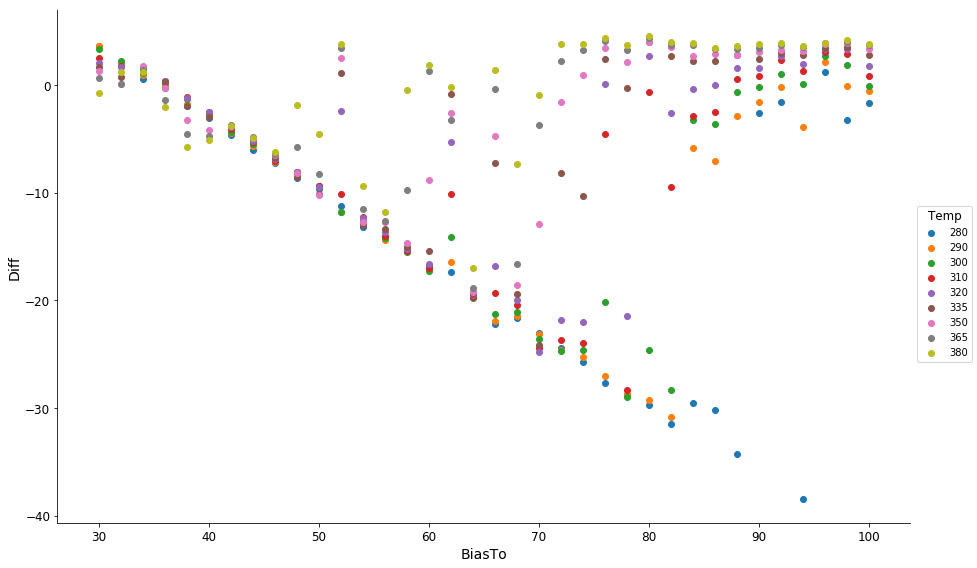

In [4]:
data = pd.read_feather("/Users/weilu/Research/server/apr_2018/tenth/force_0.04_rg_0.15_lipid_1.0_mem_1_go_0.8/rerun_5_07_Apr_160809.feather")
dic = {"T0":280, "T1":290, "T2":300, "T3":310, "T4":320, "T5":335, "T6":350, "T7":365, "T8":380, "T9":410, "T10":440, "T11":470}
a = data
a["Temp"] = a["Temp"].apply(lambda x: dic[x])
rerun5 = data
t = a.query("Temp < 400").groupby(["BiasTo","Temp"])[["DisReal","Run"]].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

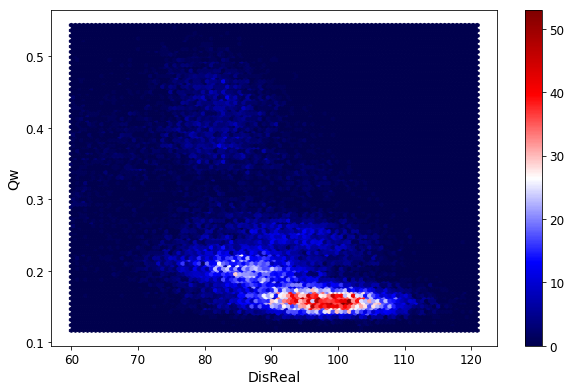

In [16]:
rerun5.query("Temp == 300 and DisReal > 60").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

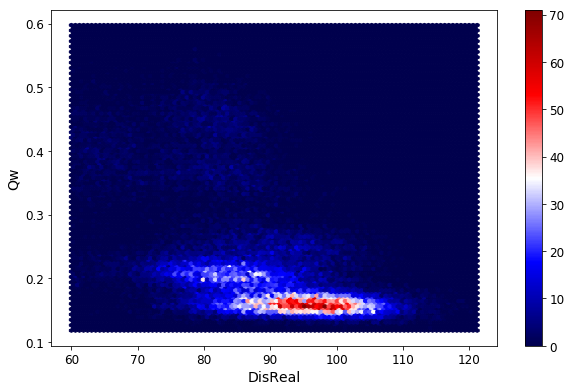

In [17]:
rerun3.query("Temp == 300 and DisReal > 60").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

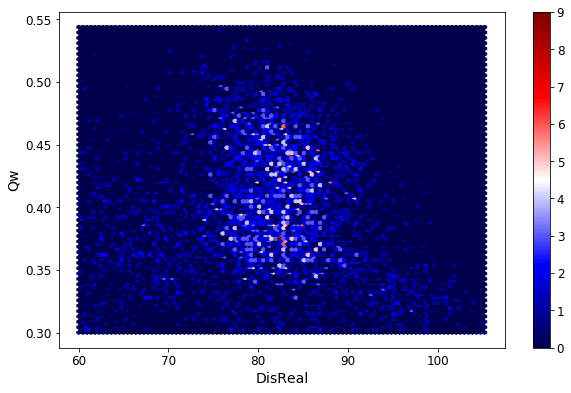

In [11]:
rerun5.query("Temp == 300 and DisReal > 60 and Qw > 0.3").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

In [20]:
rerun5.query("Temp == 300 and DisReal > 60 and Qw > 0.3 and z_h6 < -10").shape

(3464, 43)

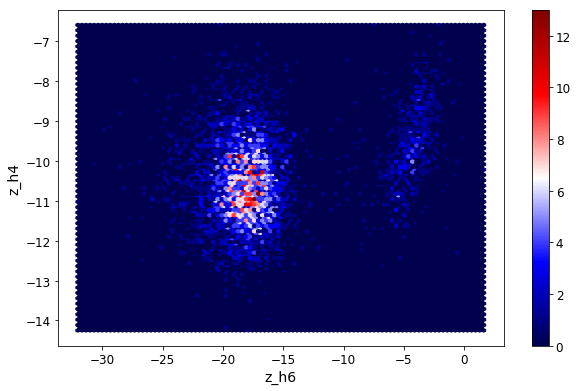

In [14]:
rerun5.query("Temp == 300 and DisReal > 60 and Qw > 0.3").plot.hexbin("z_h6", "z_h4", cmap="seismic", sharex=False)

(3636, 43)

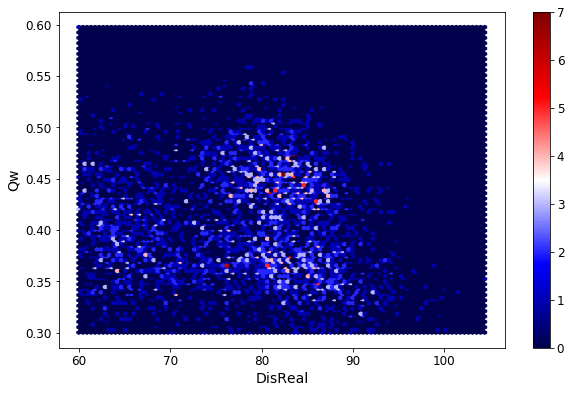

In [13]:
rerun3.query("Temp == 300 and DisReal > 60 and Qw > 0.3").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)
rerun3.query("Temp == 300 and DisReal > 60 and Qw > 0.3").shape

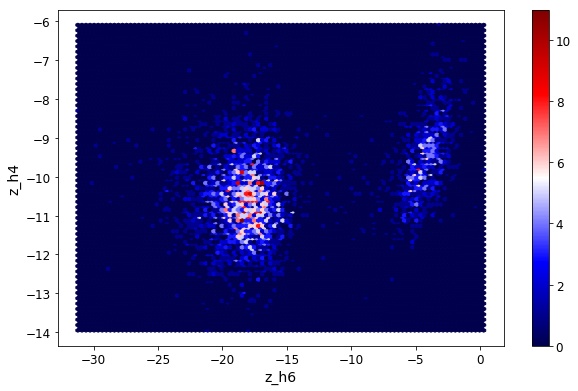

In [15]:
rerun3.query("Temp == 300 and DisReal > 60 and Qw > 0.3").plot.hexbin("z_h6", "z_h4", cmap="seismic", sharex=False)

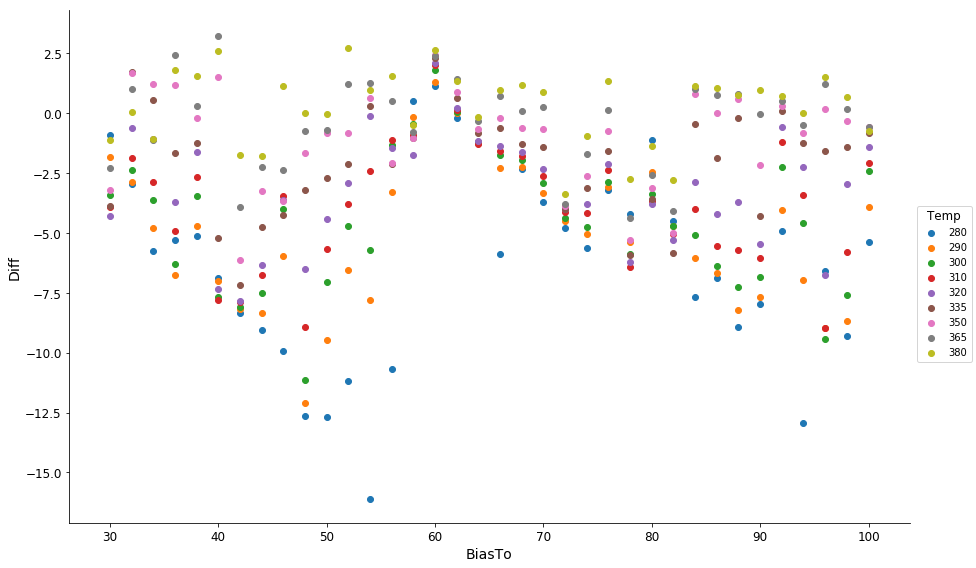

In [23]:
data = pd.read_feather("/Users/weilu/Research/server/apr_2018/tenth/force_0.02_rg_0.15_lipid_1.0_mem_1_go_0.8/rerun_1_20_Apr_000344.feather")
dic = {"T0":280, "T1":290, "T2":300, "T3":310, "T4":320, "T5":335, "T6":350, "T7":365, "T8":380, "T9":410, "T10":440, "T11":470}
a = data
a["Temp"] = a["Temp"].apply(lambda x: dic[x])
rerun1 = data
t = a.query("Temp < 400").groupby(["BiasTo","Temp"])[["DisReal","Run"]].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

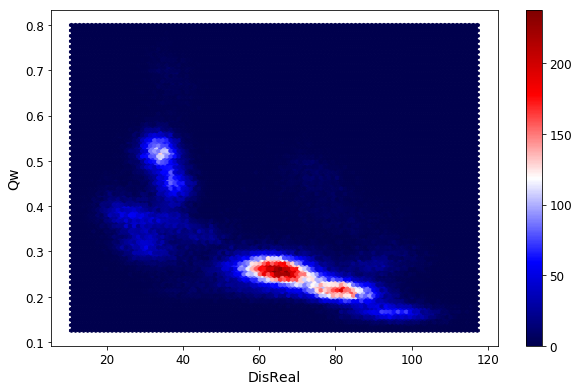

In [24]:
rerun1.query("Temp == 300").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

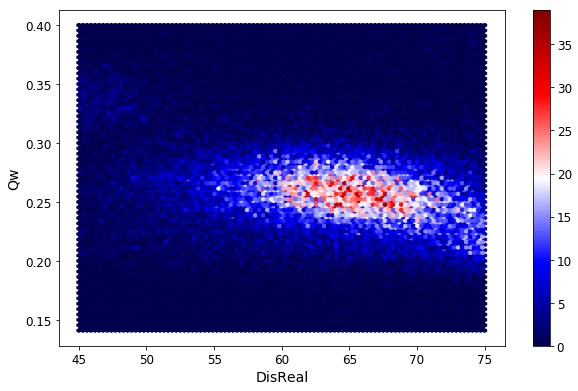

In [37]:
t = rerun1.query("Temp == 300 and DisReal > 45 and Qw < 0.4 and DisReal < 75")
t.plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

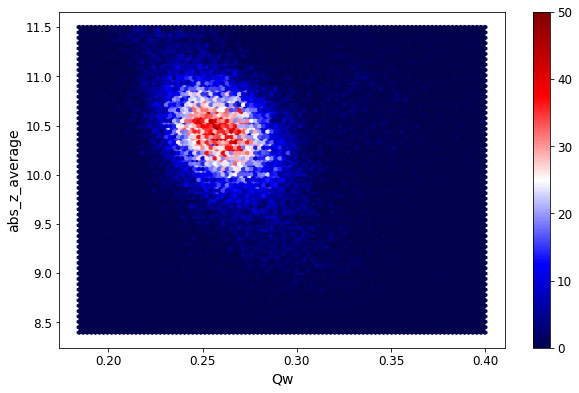

In [42]:
tt = t.query("abs_z_average < 11.5")
tt.plot.hexbin("Qw", "abs_z_average", cmap="seismic", sharex=False)

In [65]:
tt.groupby(["BiasTo", "Run"])["Lipid10"].describe().query("count > 300")

count      mean       std       min       25%       50%       75%  \
BiasTo Run                                                                      
46.0   2    307.0  1.100483  0.521423  0.000115  0.791854  1.209133  1.559808   
52.0   4    342.0 -1.125146  1.994879 -4.033899 -2.956712 -1.926498  1.105971   
       6    397.0 -0.215200  1.958638 -4.186545 -2.336390  0.786614  1.435522   
       9    322.0  1.076904  0.648616 -3.303782  0.808364  1.203760  1.531054   
54.0   4    358.0  1.156076  0.458808 -1.533562  0.881017  1.251798  1.527541   
       6    335.0  1.208023  0.422083 -0.429662  0.965483  1.280356  1.551169   
56.0   1    529.0  0.211981  1.712207 -4.085001  0.087656  0.929978  1.414544   
       7    327.0  0.394707  1.789886 -4.319222  0.214255  1.263051  1.584087   
       11   306.0  1.033365  0.539249  0.000060  0.623528  1.180946  1.484359   
58.0   1    361.0  0.795287  1.174824 -3.867199  0.701712  1.125905  1.441814   
       2    427.0  1.168239  0.441780  0.005996  0.859950  1.264291  1.564245   
       8    583.0  1.147143  0.450542  0.004146  0.821638  1.221955  1.540328   
60.0   0    400.0  1.072722  0.473012  0.004161  0.724988  1.100843  1.502705   
       1    345.0  1.215116  0.452447 -0.665481  0.938613  1.335236  1.588421   
       7    389.0  1.082562  0.579061 -3.604588  0.817613  1.168691  1.499088   
62.0   0    448.0  1.153499  0.467108  0.004069  0.837378  1.244259  1.565382   
       2    344.0  1.124096  0.475613 -0.470738  0.768438  1.192928  1.555730   
       4    383.0  1.103671  0.427215  0.014664  0.789999  1.146137  1.468943   
       10   331.0  0.977196  0.728786 -3.767471  0.626453  1.175013  1.456626   
64.0   0    345.0  1.041544  0.481060  0.000022  0.680090  1.107818  1.442522   
       3    376.0  1.104232  0.466404  0.005438  0.708311  1.181531  1.512243   
       4    345.0  1.141316  0.467962 -0.050981  0.785967  1.254485  1.533505   
       9    331.0  1.091651  0.422201  0.059568  0.746433  1.190647  1.429166   
       10   303.0  1.101510  0.443183  0.004102  0.759690  1.154904  1.491549   
66.0   1    425.0  1.010915  0.453327  0.005617  0.672741  1.026784  1.405569   
       2    419.0  1.048867  0.458478  0.004176  0.712369  1.098962  1.434218   
       4    417.0  1.050033  0.474583 -0.829220  0.709973  1.117042  1.431415   
       7    419.0  0.992691  0.449418  0.004150  0.642506  1.016692  1.334435   
       11   440.0  0.962256  0.474617  0.004787  0.569975  0.919888  1.385618   
68.0   1    424.0  0.996680  0.453562  0.004132  0.649900  1.033319  1.366065   
       2    343.0  0.997502  0.489404  0.003997  0.603924  1.046652  1.421875   
       3    341.0  0.933304  0.480380  0.004047  0.554473  0.948992  1.345829   
       5    420.0  0.992904  0.450506  0.004083  0.641861  0.971343  1.369883   
70.0   2    385.0  1.007708  0.438575  0.004107  0.659050  1.059179  1.349639   
       9    529.0  1.061283  0.434087  0.004124  0.778561  1.109771  1.394244   
       11   383.0  0.908388  0.619221 -3.073831  0.587010  0.973653  1.334247   
72.0   0    398.0  0.851358  0.455753  0.004120  0.488230  0.833776  1.222140   
       6    326.0  0.940570  0.469459  0.000041  0.550005  0.960236  1.304825   
74.0   1    469.0  0.943418  0.464831  0.003972  0.575428  0.949148  1.326310   
       7    450.0  0.920953  0.447867  0.004160  0.548335  0.991817  1.267846   
76.0   6    422.0  0.821147  0.444181  0.004010  0.476790  0.794802  1.140432   
78.0   1    350.0  0.800389  0.438231  0.004134  0.441279  0.808085  1.104766   
       6    389.0  0.805171  0.454558  0.004130  0.450802  0.757200  1.204572   
       11   320.0  0.892058  0.460178  0.000183  0.532760  0.927276  1.255698   
80.0   11   306.0  0.674257  0.410835  0.003873  0.359104  0.624965  0.942253   
86.0   7    310.0  0.640812  0.421699  0.003945  0.288434  0.586108  0.975633   

                 max  
BiasTo Run            
46.0   2    1.731777  
52.0   4    1.728648  
       6    1.732365  
       9

In [31]:
rerun1.columns

Index(['Step', 'Run', 'Temp', 'Qw', 'Energy', 'DisReal', 'z_average',
       'abs_z_average', 'z_h1', 'z_h2', 'z_h3', 'z_h4', 'z_h5', 'z_h6',
       'Distance', 'AMH-Go', 'Membrane', 'Rg', 'rg1', 'rg2', 'rg3', 'rg4',
       'rg5', 'rg6', 'rg_all', 'Lipid', 'Lipid1', 'Lipid2', 'Lipid3', 'Lipid4',
       'Lipid5', 'Lipid6', 'Lipid7', 'Lipid8', 'Lipid9', 'Lipid10', 'Lipid11',
       'Lipid12', 'Lipid13', 'Lipid14', 'Lipid15', 'TotalE', 'BiasTo'],
      dtype='object')

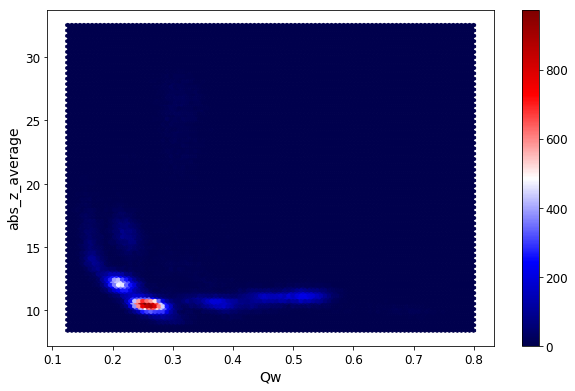

In [33]:
rerun1.query("Temp == 300").plot.hexbin("Qw", "abs_z_average", cmap="seismic", sharex=False)

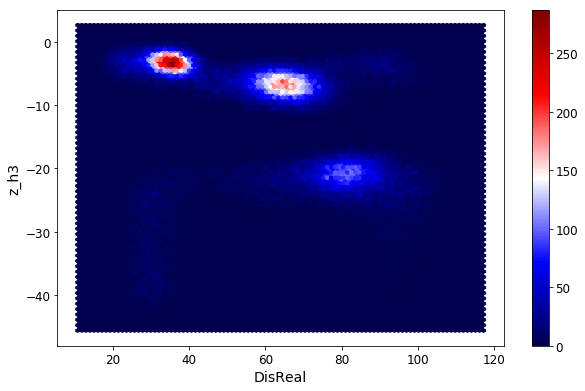

In [27]:
rerun1.query("Temp == 300").plot.hexbin("DisReal", "z_h3", cmap="seismic", sharex=False)

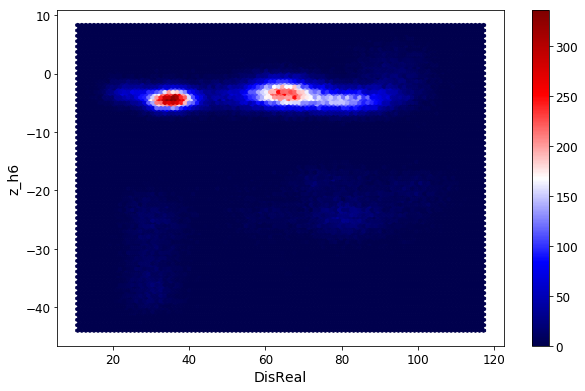

In [29]:
rerun1.query("Temp == 300").plot.hexbin("DisReal", "z_h6", cmap="seismic", sharex=False)

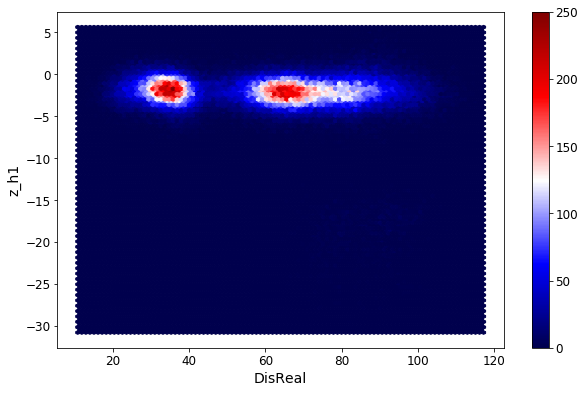

In [30]:
rerun1.query("Temp == 300").plot.hexbin("DisReal", "z_h1", cmap="seismic", sharex=False)